# Studies of data reuse: The essential role of feedback processing for figure-ground perception in mice (v1)

In this notebook we will look more closely at the EBRAINS dataset "[The essential role of feedback processing for figure-ground perception in mice (v1)](https://search.kg.ebrains.eu/?category=Dataset&q=FGM&modality[0]=electrophysiology&dataAccessibility[0]=free%20access#088a7717-76d2-4520-b9e8-3f2fecce1ee4)", contributed by Pieter Roelfsema from the Department of Vision and Cognition of Amsterdam, Netherlands.

As we can see from the dataset description,

<i>In this dataset we investegated the role of feedback processing for  figure-ground modulation (FGM) in mice. The segregation of figures from the background is an important step in visual perception.  </i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/088a7717-76d2-4520-b9e8-3f2fecce1ee4).

This dataset forms part of the results reported in Kirchberger L, Mukherjee S, Schnabel UH, van Beest EH, Barsegyan A, Levelt CN, Heimel JA, Lorteije JAM, van der Togt C, Self MW, Roelfsema PR. The essential role of recurrent processing for figure-ground perception in mice. *Sci Adv. *2021 Jun **30**;7(27).https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8245045/

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Note:
Very easy to reuse the data. Code for the other figures can be found in the EBRAINS dataset and can be opened with MATLAB, I verified the validity and accuracy of the code. 


In [1]:
#prepare notebook
!pip install mat73
import mat73
import statistics
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import pandas as pd
import scipy.stats
from scipy.stats import sem
from matplotlib.pyplot import figure

/home/isaurebotherel/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#data presentation
df_phase=pd.read_excel('OriAndPhaseDPrimePass_5mice.xlsx')
print('OriAndPhaseDPrimePass_5mice.xlsx','\n',df_phase)
df_ori=pd.read_excel('OriAndPhaseDPrimePass_9mice.xlsx')
print('OriAndPhaseDPrimePass_9mice.xlsx','\n',df_ori)
df=pd.read_excel('FG_Dprime_AllReactions.xlsx')
print('FG_Dprime_AllReactions.xlsx','\n',df)
data= scipy.io.loadmat('FGpaper_Figure4_Data.mat')
print('FGpaper_Figure4_Data.mat','\n',data)
data2= scipy.io.loadmat('FGpaper_Figure6_Data.mat')
print('FGpaper_Figure6_Data.mat','\n',data2)

OriAndPhaseDPrimePass_5mice.xlsx 
      Ori V1    Ori Vl   Ori Val   Ori Vrl    Ori Va   Ori Vam   Ori Vpm  \
0  0.330378  0.023988  0.236801  0.280597  0.175152  0.179341  0.199860   
1  0.421715  0.374109  0.361349  0.221000  0.050252  0.106870  0.237207   
2  0.395209  0.255779  0.241570  0.184944  0.044351  0.072184  0.166782   
3  0.426805  0.296938  0.299381  0.247203  0.063945  0.130671  0.229518   
4  0.597756  0.283901  0.314572  0.277472  0.181886  0.285779  0.305646   

    Ori RSP    Ori M1    Ori M2  Phase V1  Phase Vl  Phase Val  Phase Vrl  \
0  0.053687  0.031804  0.034408  0.548276  0.377963   0.443970   0.359822   
1  0.076024 -0.007310  0.067765  0.318458  0.248459   0.167438   0.073403   
2  0.036760  0.030261  0.007198  0.219837  0.046912   0.095738   0.058153   
3  0.070512  0.013669  0.023678  0.531350  0.318695   0.287415   0.271166   
4  0.105733 -0.024667 -0.014275  0.502948  0.348337   0.458184   0.448165   

   Phase Va  Phase Vam  Phase Vpm  Phase RSP  Phase

### Figure 1c

<Figure size 1200x600 with 0 Axes>

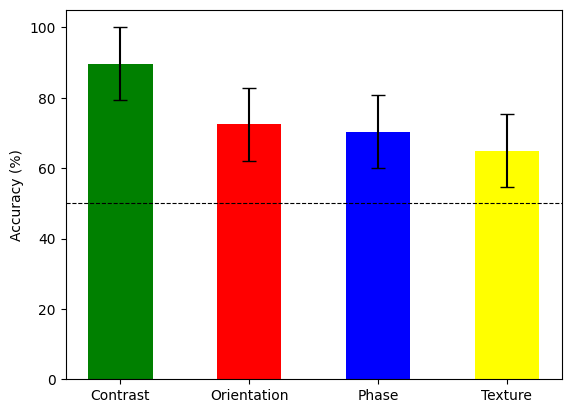

In [3]:

%matplotlib inline
figure(figsize=(20, 10), dpi=60)
data=[94.62, 91.54, 96.57, 80.07, 87.34, 90.57,  91.81, 93.28, 75.82, 95.14, 71.98, 66.84, 71.44, 69.41, 84.35, 71.33, 65.71, 73.54, 78.47, 64.63, 75.64, 69.85, 78.73,70.49, 66.42, 68.21, 70.66, 72.39, 73.75,  67.42, 64.73,  62.66 ]
error=np.std(data)

averages=[mean(data[0:10]), mean(data[10:23]), mean(data[23:29]),mean(data[29:32])]
name=['Contrast','Orientation','Phase','Texture']

color=['green','red','blue','yellow']
fig, ax = plt.subplots()
ax.bar(name, averages, yerr=error, align='center',color=color, ecolor='black', capsize=5, width=0.5)


ax.set_ylabel('Accuracy (%)')
ax.set_xticks(name)
plt.axhline(y=50, linestyle='--', color='black', linewidth=0.8)

plt.show()

### Figure 3C

<Figure size 160x120 with 0 Axes>

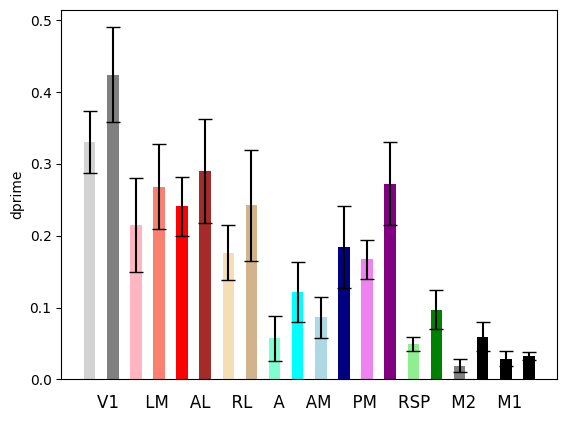

In [4]:

phase_list=[]
phase_error=[]
ori_error=[]
ori_list=[]
def list_making(df,list_name,error_list,j,n):
    i=(j)
    while i<(n):
        a=[]
        (a).append(df[df.columns[i]][0])
        (a).append(df[df.columns[i]][1])
        (a).append(df[df.columns[i]][2])
        (a).append(df[df.columns[i]][3])
        (a).append(df[df.columns[i]][4])
        error_list.append(sem(a))
        a=mean(a)
        list_name.append(a)
        i=i+1
list_making(df_phase,phase_list,phase_error,10,20)
list_making(df_ori,ori_list,ori_error,0,10)
x=[1,3,5,7,9,11,13,15,17,19]
x1=[2,4,6,8,10,12,14,16,18,20]
figure(figsize=(2, 1.5), dpi=80)
fig, ax = plt.subplots()
colour=['grey','salmon','brown','tan','aqua','navy','purple','green','black','black']
colour2=['lightgrey','lightpink','red','wheat','aquamarine','lightblue','violet','lightgreen','grey','black']
ax.bar(x, ori_list, yerr=ori_error, color=colour2,align='center', ecolor='black', capsize=5, width=0.5)
ax.bar(x1, phase_list, yerr=phase_error, color=colour,align='center', ecolor='black', capsize=5, width=0.5)
plt.ylabel('dprime')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('V1     LM    AL    RL    A    AM    PM    RSP    M2    M1',y=-0.1)
plt.show()

### Figure 3d

<Figure size 160x120 with 0 Axes>

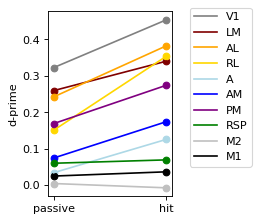

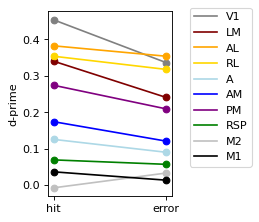

In [5]:
#still need to figure out error bars
#get data

VlError=[]
VlError.append(df['VlError'])
figure(figsize=(2, 1.5), dpi=80)
hit_list=[]
error_list=[]
passive_list=[]
def list_making(list_name,j,n):
    i=(j)
    while i<(n):
        a=[]
        (a).append(df[df.columns[i]][0])
        (a).append(df[df.columns[i]][1])
        (a).append(df[df.columns[i]][2])
        (a).append(df[df.columns[i]][3])
        (a).append(df[df.columns[i]][4])
        a=mean(a)
        list_name.append(a)
        i=i+1
list_making(hit_list,0,10)
list_making(error_list,10,20)
list_making(passive_list,20,30)
x1=[1,1,1,1,1,1,1,1,1,1]
x2=[2,2,2,2,2,2,2,2,2,2]
colours=['grey','maroon','orange','gold','lightblue','blue','purple','green','silver','black']
legend=['V1','LM','AL','RL','A','AM','PM','RSP','M2','M1']
#plt.scatter(x1,passive_list,c=colours)
#plt.scatter(x2,hit_list, c=colours)
#plt.show()


ya=passive_list+hit_list

yb=hit_list+error_list

x=x1+x2
def plot(y_list,x_title):
    figure(figsize=(2, 3), dpi=80)
    n=0
    i=0
    while i<10:
        x1, x2 = x_title
        y1, y2 = y_list[n], y_list[n+10]
        plt.plot([x1,x2],[y1,y2],linestyle='-', c=colours[n])
        plt.legend(legend,bbox_to_anchor=(1.1, 1.05))
        n=n+1
        i=i+1
    n=0
    i=0
    while i<10:
        plt.scatter(x1,y_list[n],c=colours[n])
        plt.scatter(x2,y_list[n+10],c=colours[n])
        
        n=n+1
        i=i+1
    plt.ylabel('d-prime')
    #plt.errorbar(x, y_list, xerr = 0.05)
    plt.show()
     
plot(ya,['passive','hit'])
plot(yb,['hit','error'])



### Figure 4f and 4e

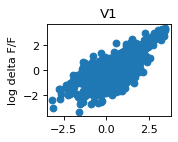

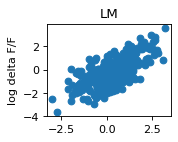

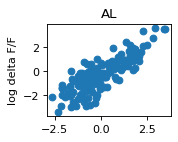

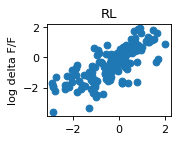

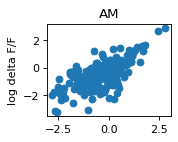

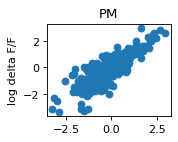

In [7]:
data= scipy.io.loadmat('FGpaper_Figure4_Data.mat')

def scatterplot_4f(number1,number2, title):
    figure(figsize=(2, 1.5), dpi=80)
    x=data['wg'][number1:number2]
    y=data['wf'][number1:number2]
    plt.scatter(y,x)
    plt.title(title)
    plt.ylabel('log delta F/F')
    #xs=np.array(x, dtype=np.float64)
    #ys=np.array(y, dtype=np.float64)
    #m,b=best_fit_slope_and_intercept(xs,ys)
    #regression_line=[(m*x)+b for x in xs]
    #plt.plot(xs,regression_line, color='black')
    plt.show()

    def best_fit_slope_and_intercept (xs,xy):
            m= ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs)-mean(xs*xs)))    
            b = mean(ys)-m*mean(xs)
            return m, b
scatterplot_4f(0,1849,'V1')
scatterplot_4f(1849,2768,'LM')
scatterplot_4f(2768,3147,'AL')
scatterplot_4f(3147,3457,'RL')
scatterplot_4f(3457,3853,'AM')
scatterplot_4f(3853,4407,'PM')


### Figure 6E,H,K

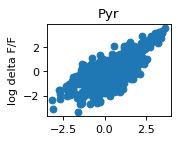

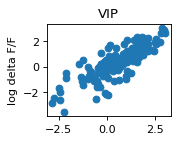

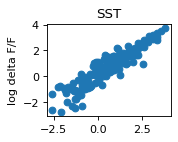

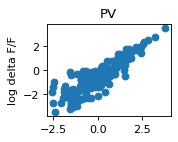

In [8]:

from matplotlib.pyplot import figure



def scatterplot_4f(number1,number2, title):
    figure(figsize=(2, 1.5), dpi=80)
    x=data2['wg'][number1:number2]
    y=data2['wf'][number1:number2]
    plt.scatter(y,x)
    plt.title(title)
    plt.ylabel('log delta F/F')
    #xs=np.array(x, dtype=np.float64)
    #ys=np.array(y, dtype=np.float64)
    #m,b=best_fit_slope_and_intercept(xs,ys)
    #regression_line=[(m*x)+b for x in xs]
    #plt.plot(xs,regression_line, color='black')
    plt.show()

    def best_fit_slope_and_intercept (xs,xy):
            m= ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs)-mean(xs*xs)))    
            b = mean(ys)-m*mean(xs)
            return m, b
scatterplot_4f(0,1849,'Pyr')
scatterplot_4f(1849,2116,'VIP')
scatterplot_4f(2116,2386,'SST')
scatterplot_4f(2386,2702,'PV')

